**7.1** 请设计一个深度为2的决策树模型，使得该模型在图 7.36 中的墨渍数据上的预测结果有100%的准确率。图7.36中的每个点的坐标（$x_{1}$,$x_{2}$）即为特征组，颜色为标签值。
![7.36](7.36.png)

答：  
![1](1.png)

**7.2** 设:$h:\left \{ 0,1 \right \}^d→\left \{ 0,1 \right \}$为一个$d$元布尔函数。请设计一个深度不超过$d+1$的决策树来表示$h$.


答：没想出来

**7.3** 在随机森林算法中，森林中树的棵数 num_trees 和每棵树的深度 max_depth 是两个重要的参数。当一个随机森林算法出现过度拟合时，应当如何调整参数 num_trees 及 max_depth 来缓解过度拟合？

答：增加num_trees，减小max_depth

**7.4** $Gini$不纯度。   
在一个 $k$ 元分类问题中，假设 $S$ 是一组训练数据。式(7.12)中定义了 $k$ 维向量 $Avg(S)$。其中，$Avg(S)$ 的第 $i$ 位表示 $S$ 中属于类别 $i$ 的数据的比例。由此可定义 $S$ 的 $Gini$ 不纯度为：    
$Gini\left ( S \right )= 1-\left \| Avg\left ( S \right ) \right \|^{2}$  
(7.23)  
  
(1)请证明:当 $S$ 中数据的类别都相同时, $Gini(S)$ 达到最小值$0$。当 $S$ 中含有全部$k$个类别的样本，且属于每个类别的样本数均为 $\left | S \right |/ k$ 时, $Gin(S)$ 达到最大值 $1-1/k$。    
(2)请实现以 $Gini$ 不纯度作为分值函数的决策树分类的CART算法。


答：  
（1）证明：  
当$S$中数据的类别都相同时，$Avg\left ( S \right )$中只有一个元素为1，其余都为0，则 $\| Avg\left ( S \right ) \|^{2}=1$，$Gini(S)$ 达到最小值$0$。  
当 $S$ 中含有全部$k$个类别的样本，且属于每个类别的样本数均为 $\frac{\left | S \right |}{k}$ 时，$Avg\left ( S \right )=\{\frac{1}{k}\}^k$，则 $\| Avg\left ( S \right ) \|^{2}=\frac{1}{k}$，则$Gin\left(S\right)$达到最大值$1-\frac{1}{k}$

In [ ]:
#（2）
import numpy as np
from machine_learning.lib.decision_tree_base import DecisionTreeBase

def get_Gini(y, idx):
    avg = np.average(y[idx], axis=0)
    return 1 - np.sum(avg ** 2)

class DecisionTreeClassifier(DecisionTreeBase):
    def __init__(self, max_depth=0, feature_sample_rate=1.0):
        super().__init__(max_depth=max_depth,
                        features_sample_rate=features_sample_rate,
                        get_score=get_Gini)
    def predict_prob(self, X):
        return super().predict(X)
    
    def predict(self, X):
        proba = self.predict_proba(X)
        return np.argmax(proba, axis=1)

**7.5** 月亮数据标签预测问题。   
月亮数据集是Sklearn工具库提供的一个数据集。它常用于分类算法与聚类算法的实践检验。图7.37 是一组月亮数据的采样。图中的每一点都表示一条数据。其中，坐标 $\left ( x_{1},x_{2} \right )$ 为特征组,颜色为标签值。
![7.37](7.37.png)   
图7.38是生成图7.37 中数据采样的程序。请基于图7.38中的程序分别实现用决策树算法与随机森林算法完成对标签的预测任务。  
![7.38](7.38.png)  


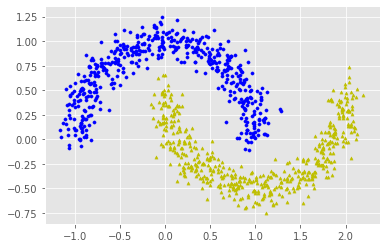

In [20]:
import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=1000, noise=0.1)
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], c='b', marker='o', s=10)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], c='y', marker='^', s=10)

plt.show()

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# 画出数据点和边界
def border_of_classifier(clf, x, y):
        ## 1 生成网格数据
        x_min, y_min = x.min(axis = 0) - 1
        x_max, y_max = x.max(axis = 0) + 1
        # 利用一组网格数据求出方程的值，然后把边界画出来。
        x_values, y_values = np.meshgrid(np.arange(x_min, x_max, 0.01),
        np.arange(y_min, y_max, 0.01))
        # 计算出分类器对所有数据点的分类结果 生成网格采样
        mesh_output = clf.predict(np.c_[x_values.ravel(), y_values.ravel()])
        # 数组维度变形  
        mesh_output = mesh_output.reshape(x_values.shape)
        fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
        ## 会根据 mesh_output结果自动从 cmap 中选择颜色
        plt.pcolormesh(x_values, y_values, mesh_output, cmap = 'rainbow')
        plt.scatter(x[:, 0], x[:, 1], c = y, s=100, edgecolors ='steelblue' , linewidth = 1, cmap = plt.cm.Spectral)
        plt.xlim(x_values.min(), x_values.max())
        plt.ylim(y_values.min(), y_values.max())
        # 设置x轴和y轴
        plt.xticks((np.arange(np.ceil(min(x[:, 0]) - 1), np.ceil(max(x[:, 0]) + 1), 1.0)))
        plt.yticks((np.arange(np.ceil(min(x[:, 1]) - 1), np.ceil(max(x[:, 1]) + 1), 1.0)))
        plt.show()

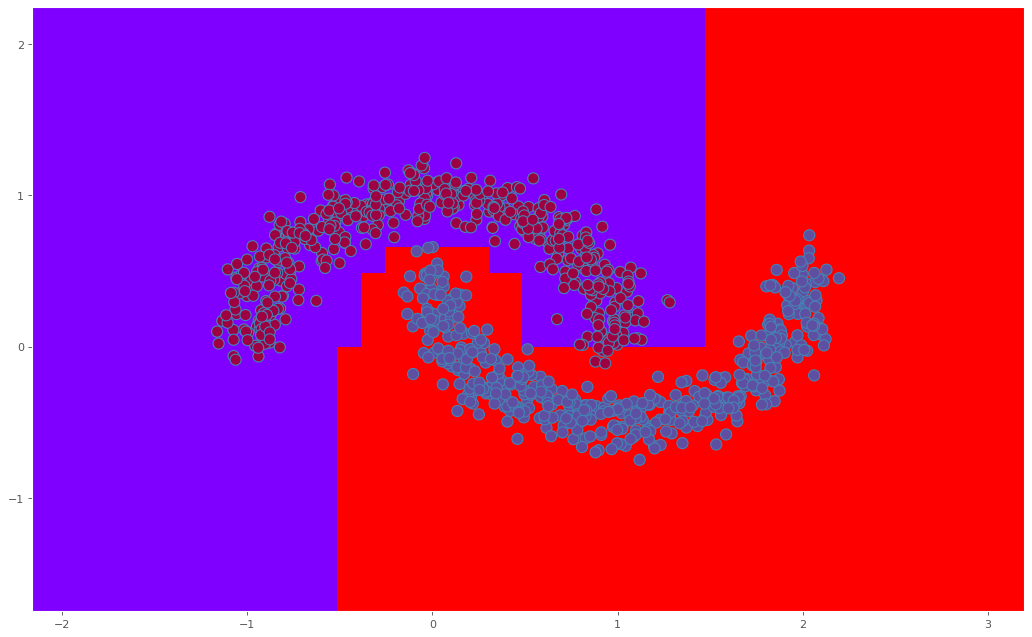

In [35]:
# 使用决策树
clf = DecisionTreeClassifier(max_depth=10, random_state=0)
clf.fit(X, y)
border_of_classifier(clf, X, y)

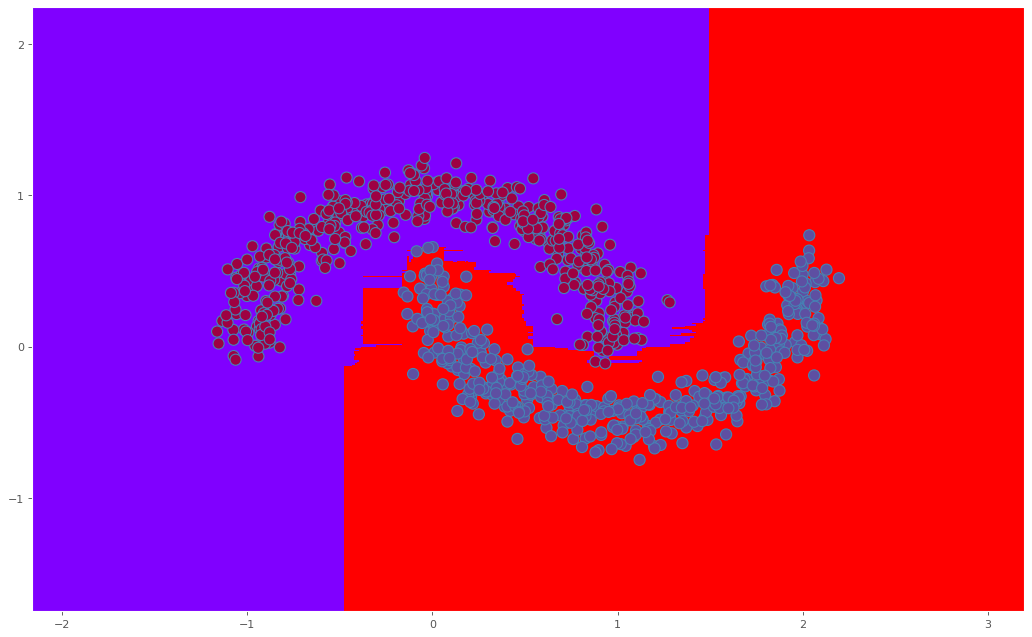

In [26]:
# 使用随机森林
clf = RandomForestClassifier(max_depth=15, random_state=0)
clf.fit(X, y)
border_of_classifier(clf, X, y)

**7.6** 收入预测问题。  
收入预测问题的任务是根据一个人的背景预测其收入情况。这实际上是一个二元分类的问题。输入预测的数据来源于UCI机器学习数据库。每一条数据包括一个标签，表明该样本的年收入是否超过5万美元。数据中还包括14个特征:年龄(age)、工作类型(workclass)、样本代表性(fnlwgt)、教育程度(education)、求学年数(education_num)、婚姻状况(marital-status)、职业属性(occupation)、家庭关系(relationship)、种族(race)、性别(sex)、投资收益(capital-gain)、投资损失(capital=loss)、工作强度(hours-per-week)以及国籍(native=country)。    
请下载收入预测的数据集 audlt.csv，并用决策树法与随机森林算法完成收入的预测问题。
> 原数据来自UCI机器学习库 http://archive.ics.uci.edu/ml/datasets/Adult 。也可以从GitHub网站的本书页面 https://github.com/wanglei18/machine_learning 下载。

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn_pandas import DataFrameMapper
# https://www.jianshu.com/p/29af03788ff6 使用pip安装
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
data_path = './adult.csv'

data = pd.read_csv(data_path)

data.drop(['fnlwgt', "education", "native-country"], axis=1, inplace=True) # 删除fnlgwt列

# =============================================================================
# 数据清洗
#replace the special character to "Unknown"
for i in data.columns:
    data[i].replace('?', 'Unknown', inplace=True)
    for col in data.columns:
        if data[col].dtype != 'int64':
            data[col] = data[col].apply(lambda val: val.replace(" ", ""))
            data[col] = data[col].apply(lambda val: val.replace(".", ""))
            


# Age 和 EdNum 列是数值型的，将连续数值型转换为更高效的方式，
# 比如将年龄转换为10的整数倍，教育年限转换为5的整数倍
colnames = list(data.columns) # 将数据的表头转换为列表并储存
colnames.remove('age')
colnames.remove('educational-num')
colnames = ['AgeGroup', 'EduGroup']+colnames

labels = ["{0}-{1}".format(i, i+9) for i in range(0,100,10)]
# https://www.runoob.com/python/att-string-format.html 利用format快速创建字符型列表
data['AgeGroup'] = pd.cut(data.age, range(0,101,10), right = False, labels = labels)
# https://www.cnblogs.com/sench/p/10128216.html 用来把一组数据分割成离散的区间 

labels = ["{0}-{1}".format(i,i+4) for i in range(0,20,5)]    
data['EduGroup'] = pd.cut(data["educational-num"], range(0,21,5), right = False, labels = labels)

data = data[colnames] # 仅提取包含colnames中的列，且按照colnames排序
# =============================================================================
# 将非数值型数据转换为数值型数据
# df_train_set.Income.value_counts()
# df_test_set.Income.value_counts()
mapper = DataFrameMapper([('AgeGroup', LabelEncoder()),('EduGroup', LabelEncoder()),
                          ('workclass', LabelEncoder()),('marital-status', LabelEncoder()),
                          ('occupation', LabelEncoder()),('relationship', LabelEncoder()),
                          ('race', LabelEncoder()),('gender', LabelEncoder()),
                          ('income', LabelEncoder())], df_out=True, default=None)

cols = list(data.columns)
cols.remove('income')
cols = cols[:-3]+['income']+cols[-3:]  # 将Income列转移到中间去

df_data = mapper.fit_transform(data.copy())
df_data.columns = cols

cols.remove('income')

# 训练数据与测试数据划分
x_train, x_test, y_train, y_test = train_test_split(df_data[cols].values, df_data['income'].values, test_size=0.3, random_state=0)

# =============================================================================
# 模型初步训练与评分
DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(x_train, y_train)
score = DecisionTree.score(x_test, y_test)
print("DecisionTreeClassifier's score:", score)

RandomForest = RandomForestClassifier(max_depth=18)
RandomForest.fit(x_train, y_train)
score = RandomForest.score(x_test, y_test)
print("RandomForest's score:", score)

DecisionTreeClassifier's score: 0.8364157510407425
RandomForest's score: 0.8640551422916809


**7.7** 波土顿房价预测问题。
波士顿房价预测问题是一个回归问题。其任务是预测美国波士顿地区各小区的平均房价。波士顿房价预测问题的数据集已经集成在Sklean数据库中。数据集中总共有506条售房数据。每条数据有1个标签，即房屋售价。每条数据还有13个特征:小区周边犯罪率(CRIM)、房屋占地面积(ZN)、小区周边非商业用地面积(INDUS)、查尔斯河指数(CHAS)、环保指标(NOX)、房屋房间数(RM)、房龄(AGE)、与市中心的距离(DIS)、交通便利指数(RAD)、地产税(TAX)、教育资源(PTRATIO)、居民种族情况(B)和居民收人情况(LSTAT)。图7. 39是获取数据的程序。请基于图7. 39中的程序,分别用决策树算法与梯度提升决策树算法完成波士顿房价预测问题。
![7.39](7.39.png)

In [79]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

X,y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

DecisionTree = DecisionTreeRegressor()
DecisionTree.fit(X_train, y_train)
print("mean squared error of DecisionTree:",mean_squared_error(y_test, DecisionTree.predict(X_test)))

GradientBoosting = GradientBoostingRegressor()
GradientBoosting.fit(X_train, y_train)
print("mean squared error of GradientBoosting:",mean_squared_error(y_test, GradientBoosting.predict(X_test)))

mean squared error of DecisionTree: 26.288749999999997
mean squared error of GradientBoosting: 12.546115083872966


**7.8** AdaBoost 集成算法。
提升算法通过$N$轮循环来训练一个集成模型。在每轮循环中，训练一个新的弱模型来弥补之前弱模型的不足。最后，输出这个$N$个弱模型预测的总和作为提升算法的输出。在这类算法中，每一轮的弱模型训练都基于全体训练数据。AdaBoost集成算法是对上述提升算法的一个改进。它的命名来自英文 Adaptive Boosting 的缩写。AdaBoost 集成算法的思想是：在每一轮循环中选取此前的弱模型预测错误的数据，以此来训练新的弱模型。这样一来，算法就能专注于越来越难的数据点，而不必为简单的数据点“分心”。上述思想是通过调整训练数据的采样概率来实现的。  
具体来说，在一个采用{-1，1}标签形式的二元分类问题中，设$H$是一个弱模型假设。给定训练数据 $S=\left \{ \left ( x^{\left ( 1 \right )} ,y^{\left ( 1 \right )}\right ) ,\left ( x^{\left ( 2 \right )},y^{\left ( 2 \right )} \right ) ,\cdot \cdot \cdot , \left ( x^{\left ( m \right )},y^{\left ( m \right )} \right ) \right \}$。图7.40 中的算法描述了AsBoot算法。初始时,算法均匀地设定每条训练数据的权重$w$。随后,进行N轮循环。在每一轮循环$t$中，以概率$\omega_{i} $选取数据$\left ( x^{\left (i  \right )},y^{\left (i  \right )} \right )$，并构成一个$S$的子集$S_{t}$。然后，基于$S_{t}$训练一个弱模型$h_{t}$。接着，在整条训练数据集$S$上计算模型$h_{t}$预测错误的概率$r_{t}$,用以确定$h_{t}$的置信度$α_{t}$。$r_{t}$越大，$α_{t}$就越小，即模型$h_{t}$的置信度就越低。算法根据模型的置信度$α_{t}$调整训练数据采样的权重$w$。增加预测错误的样本的权重,且降低预测正确的样本的权重，最后，返回$h_{1},h_{1},h_{3},\cdot \cdot \cdot ,h_{N} $的以置信度为加权和的提升模型。  
![7.40](7.40.png)  
取弱模型假设$H$为深度不超过$d$的决策树模型，请以此实现决策树的AdaBoost提升算法。

In [ ]:
def SampleSubset(w, w_temp, X, y): # 选取子集
    return X[np.squeeze((w > w_last))==True], y[np.squeeze((w > w_temp))==True]
h = []
alpha = []
def AdaBoost(X, y):
    m, _ = X.shape
    w = np.ones((m,1)) / m
    w_last = w
    for t in range(1, N):
        # 选取样本子集St
        St_x, St_y = SampleSubset(w, w_temp, X, y)
        w_last = w #w_last记录的是更新前的w，通过比较w与w_last可得到上次的错误点
        # 训练模型
        model = DecisionTree()
        model.fit(St_x, St_y)
        h.append(model)
        # 计算rt
        rt = np.sum(w.T.dot((y!=h.predict(X)).astype(np.int)))
        # 计算alpha_t
        alpha_t = 0.5 * np.log((1 - r) / r)
        alpha.append(alpha_t)
        # 调整w
        for i in range(1, m):
            w[i] *= np.exp(alpha[t] * y[i] * h[t].predict(X[i])) 
        w /= np.sum(w)
        w_last /= np.sum(w_last) 
        theta /= np.sum(w)
    return np.sign(np.sum(np.array(alpha) * np.array(h)))